# Discrete Visualization on International Visitation and Spending in the United States

Data from the International Trade Administration Industry and Analysis National Travel and Tourism Office, a national bureau dedicating to enhancing tourism in the United States, and the **International Visitation and Spending in the United States** project. This example provides insights based on the given tourist visitation number for different states in the U.S.

## Loading Data

For this example, I will:

* Import the `US_States_Visited_2017.xlsx`, `US_States_Visited_2018.xlsx` and `US_States_Visited_2019.xlsx` datasets.   

* Pick out the relevant columns and multiply all the visitation numbers by 1,000 for all 3 datasets.

* Merge the 3 datasets together and order the state names alphabetically. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

def load_data():

    # importing datasets
    df_2017=pd.read_excel('assets/US_States_Visited_2017.xlsx', skiprows=6,skipfooter=13)
    df_2018=pd.read_excel('assets/US_States_Visited_2018.xlsx', skiprows=7,skipfooter=7)
    df_2019=pd.read_excel('assets/US_States_Visited_2019.xlsx', skiprows=6,skipfooter=8)
    
    # renaming columns
    df_2017.columns = ['2017_rank','state','2016_market_share','visitation_2016','2017_market_share','visitation_2017','volume_change']
    df_2018.columns = ['2018_rank','state','2018_market_share','visitation_2018','volume_change','2017_market_share','visitation_2017']
    df_2019.columns = ['2019_rank','state','2019_market_share','visitation_2019','volume_change','2018_market_share','visitation_2018']
    
    # stripping state names
    df_2017['state'] = df_2017['state'].str.strip()
    df_2018['state'] = df_2018['state'].str.strip()
    df_2019['state'] = df_2019['state'].str.strip()

    # dropping all columns except for relevent state and visitation columns
    df_2017.drop(df_2017.columns[[0,2,4,6]], axis=1,inplace=True)
    df_2018.drop(df_2018.columns[[0,2,4,5,6]], axis=1,inplace=True)
    df_2019.drop(df_2019.columns[[0,2,4,5,6]], axis=1,inplace=True) 
    
    # multiplying visitation by 1000 to get accurate value
    df_2017['visitation_2016'] = df_2017['visitation_2016']*1000
    df_2017['visitation_2017'] = df_2017['visitation_2017']*1000
    df_2018['visitation_2018'] = df_2018['visitation_2018']*1000
    df_2019['visitation_2019'] = df_2019['visitation_2019']*1000
    
    # starting output at state column
    df_2017=df_2017.set_index('state')
    df_2018=df_2018.set_index('state')
    df_2019=df_2019.set_index('state')
    
    # merging all datasets by state variable
    merged_US_states_visitation = df_2017.merge(df_2018,on='state',how= 'outer').merge(df_2019,on='state',how='outer')
    
    #sorting by name
    merged_US_states_visitation.sort_index(inplace=True)

    return merged_US_states_visitation

load_data().head(25)

,visitation_2016,visitation_2017,visitation_2018,visitation_2019
state,,,,
Alabama,1.240000e+05,136000.0,155545.0,141000
Alaska,NaN,NaN,135603.0,109000
Arizona,1.157751e+06,1035000.0,1168582.0,1196000
California,8.220783e+06,8178000.0,8531051.0,8050000
Colorado,4.849022e+05,459000.0,550390.0,509000
Connecticut,3.232681e+05,303000.0,291149.0,323000
Florida,9.540168e+06,9481000.0,9376578.0,9610000
Georgia,8.758310e+05,879000.0,837551.0,868000
Guam,1.582510e+06,1681000.0,1615276.0,1842000


## Bar Chart

With the merged data, I will:
* Make 4 plots, each of which is a bar chart representing the total visitation (as y-axis) of each state (shown in x-axis) in year 2016, 2017, 2018 and 2019. Each plot uses the data for each year.
* Make the figures readable by adjusting the figure size, and specify the year of each plot using the title.

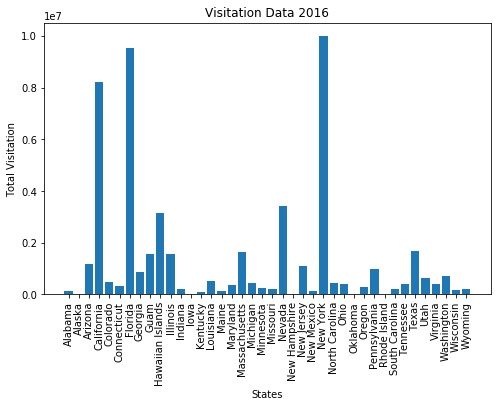

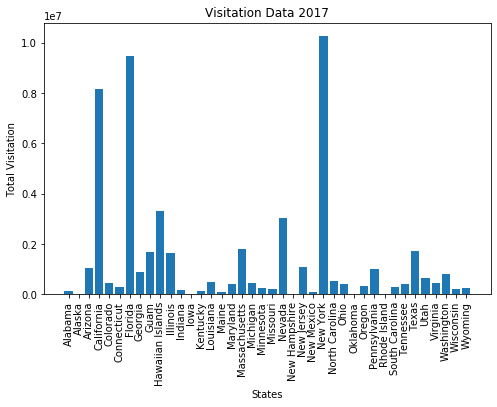

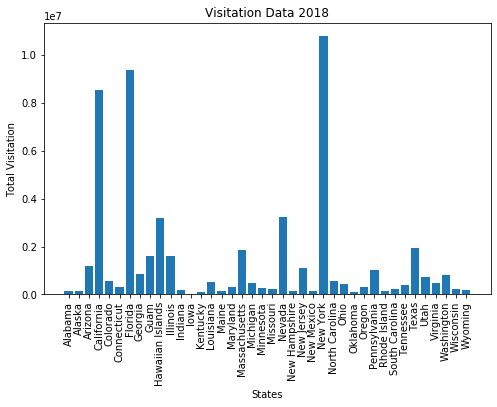

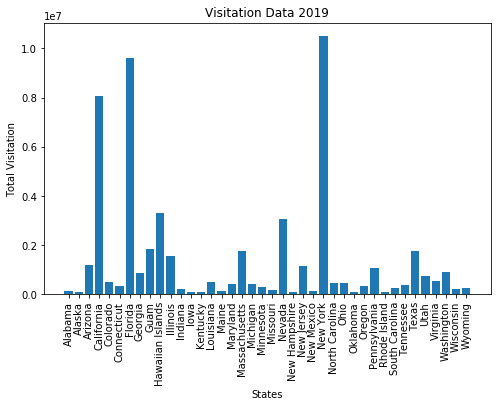

In [3]:
def make_bar_chart(data):
    
    df = load_data()
    df.columns = ['Visitation Data 2016', 'Visitation Data 2017', 'Visitation Data 2018', 'Visitation Data 2019']
    for i in list(df.columns):
        plt.figure(figsize=(8,5))
        plt.bar(df.index, df[i])
        plt.title(str(i))
        plt.xticks(rotation = "vertical")
        plt.xlabel("States")
        plt.ylabel("Total Visitation")
        plt.show()

make_bar_chart(load_data())

## Transformation
To better visualize the visitation data to the stakeholders, I will perform **log-transformation** on the visitation number (log base 10) and make the same bar charts again and:

* Build the bar chart again with all visitation number log-transformed

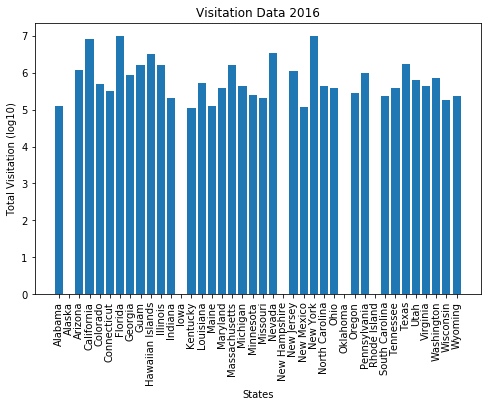

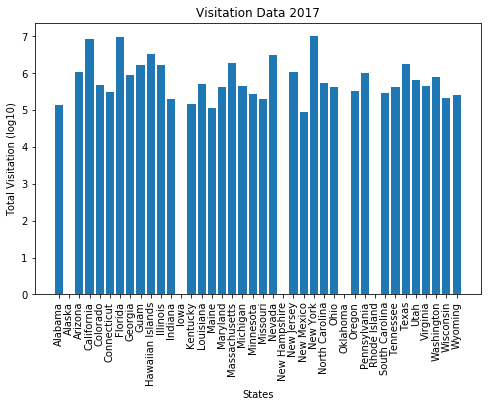

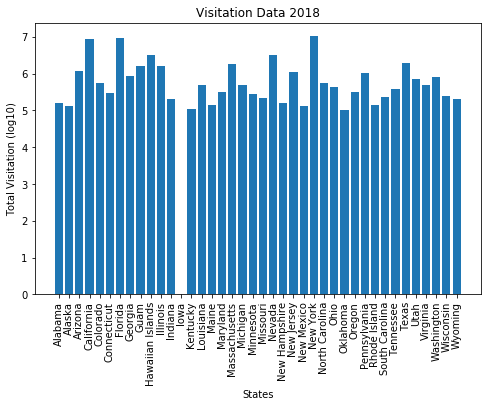

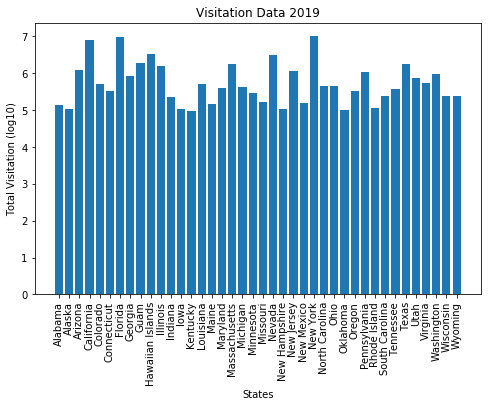

In [5]:
def make_transformed_bar_chart(data):   
    df = load_data()
    df.columns = ['Visitation Data 2016', 'Visitation Data 2017', 'Visitation Data 2018', 'Visitation Data 2019']
    to_log = ['Visitation Data 2016', 'Visitation Data 2017', 'Visitation Data 2018', 'Visitation Data 2019']
    df_log = df[to_log].applymap(lambda x: np.log10(x+1))
    for i in list(df_log.columns):
        plt.figure(figsize=(8,5))
        plt.bar(df_log.index, df_log[i])
        plt.title(str(i))
        plt.xticks(rotation = "vertical")
        plt.xlabel("States")
        plt.ylabel("Total Visitation (log10)")        
        plt.show()

make_transformed_bar_chart(load_data())

## Zipf's Law on Visitation

Zipf's law is an empirical law originally proposed by a linguist George Kingsley Zipf to generalize word frequency. Zipf's law states that given a large text corpus with many vocabularies used, the frequency of any word is inversely proportional to its rank in the frequency table. There is a wikipedia page talking about his academic contribution: https://en.wikipedia.org/wiki/George_Kingsley_Zipf

For example, **the** is the most frequently occurring word which accounts for nearly 7% of all the words; the runner-up word is **of** which accounts for slightly over 3.5% of words, followed by **and** which accounts for around 2.8%. He observed these patterns and generalized that the $n^{th}$ most frequently occurring word has a frequency of $\frac{1}{n}$ proportional to the most popular word!

Do visitation numbers follow the Zipf's law? To answer this, I will make a plot which 
* shows the bar chart of international tourist visitation in 2019 for each state sorted descending for the number (you’ve done a bar chart for 2019, now you just need to plot the 2019 visitation number by descending order)
* Overlay the Zipf's curve on the graph based on the inverse proportion relationship between visitation and rank (so you need to understand Zipf's law and calculate this)
* and finally annotate the image indicating whether or not the tourist visitation approximates the Zipf's law

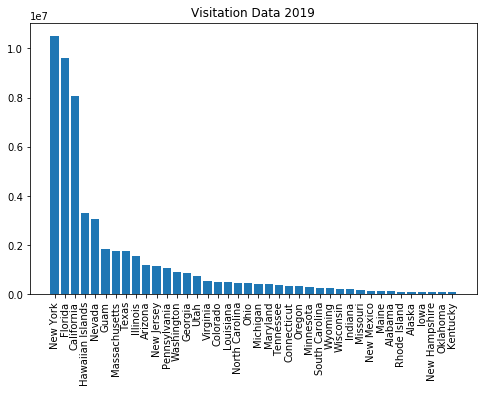

,Visitation Data 2019
state,
New York,10518000
Florida,9610000
California,8050000
Hawaiian Islands,3296000
Nevada,3058000
Guam,1842000
Massachusetts,1745000
Texas,1745000
Illinois,1555000


In [6]:
from scipy.stats import zipf
from scipy.optimize import curve_fit
from scipy.special import zetac

def zipf_approximation_visitation(data):
# preprocessing the data

    # importing the data and removing header/footer
    df=pd.read_excel('assets/US_States_Visited_2019.xlsx', skiprows=6,skipfooter=8)
    # renaming columns
    df.columns = ['2019_rank','state','2019_market_share','visitation_2019','volume_change','2018_market_share','visitation_2018']
    # stripping white space
    df['state'] = df['state'].str.strip()
    # keeping only data from states and visitation_2019 and removing all other columns
    df.drop(df.columns[[0,2,4,5,6]], axis=1,inplace=True) 
    # recalculating visitation_2019 
    df['visitation_2019'] = df['visitation_2019']*1000
    # setting index to state volumn
    df=df.set_index('state') 
    # putting in descending order
    df.sort_index(ascending=False)
    # creating bar chart 
    df.columns = ['Visitation Data 2019']
    for i in list(df.columns):
        plt.figure(figsize=(8,5))
        plt.bar(df.index, df[i])
        plt.title(str(i))
        plt.xticks(rotation = "vertical")
        plt.show()
        
    return df

zipf_approximation_visitation(load_data())